In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../calibrated data/SB2_data.npy")       # rename your 2D array
waveem = np.load("../calibrated data/SB2_waveem.npy")

window_size = 5
step        = 1
scale       = 0.4   # arcsec per pixel

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    noise = make_noise(df_cut)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    pp, gas_templates = run_ppxf(lam, fwhm, velscale, df_rb, noise)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       770        92
 comp.  1:      -180         1
 comp.  2:       588       740
chi2/DOF: 0.6382; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 174; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.827       2.0    -180     1
Comp:  2           [NII]6583_d      12.27       5.8     588   740
-----------------------------------------------------------------
pPXF fit done in 14.69 s
PIXEL: 152
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'He

 Best Fit:       Vel     sigma
 comp.  0:       492       300
 comp.  1:      -227        89
 comp.  2:      -160       170
chi2/DOF: 0.4880; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 140; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      15.75       1.5    -227    89
Comp:  2           [NII]6583_d      8.975       2.2    -160   170
-----------------------------------------------------------------
pPXF fit done in 14.83 s
PIXEL: 161
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       571       318
 comp.  1:      -239        69
 comp.  2:   

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       825       776
 comp.  1:      -152       159
 comp.  2:      -179       262
chi2/DOF: 0.3403; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      29.17       1.2    -152   159
Comp:  2           [NII]6583_d      17.76       1.8    -179   262
-----------------------------------------------------------------
pPXF fit done in 22.91 s
PIXEL: 171
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeI

 Best Fit:       Vel     sigma
 comp.  0:      -143       526
 comp.  1:      -114       211
 comp.  2:       -64        49
chi2/DOF: 0.6699; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 87; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      3.281      0.84    -114   211
Comp:  2           [NII]6583_d      2.122      0.78     -64    49
-----------------------------------------------------------------
pPXF fit done in 9.27 s
PIXEL: 180
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       -99       582
 comp.  1:      -131       201
 comp.  2:     

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -348       578
 comp.  1:       -62       210
 comp.  2:       -80       186
chi2/DOF: 0.4274; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 124; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      3.859      0.42     -62   210
Comp:  2           [NII]6583_d      4.361      0.51     -80   186
-----------------------------------------------------------------
pPXF fit done in 12.36 s
PIXEL: 190
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeI

 Best Fit:       Vel     sigma
 comp.  0:        14       593
 comp.  1:      -111       205
 comp.  2:       -92       218
chi2/DOF: 0.4215; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 91; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      6.430      0.86    -111   205
Comp:  2           [NII]6583_d      5.232       1.1     -92   218
-----------------------------------------------------------------
pPXF fit done in 16.66 s
PIXEL: 199
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       -27       606
 comp.  1:       -81       202
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -954      1000
 comp.  1:       187       168
 comp.  2:       151       200
chi2/DOF: 0.6500; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 12; Func calls: 211; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 6/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      8.650      0.92     187   168
Comp:  2           [NII]6583_d      6.612       1.2     151   200
-----------------------------------------------------------------
pPXF fit done in 22.95 s
PIXEL: 209
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'He

 Best Fit:       Vel     sigma
 comp.  0:       821      1000
 comp.  1:       184       215
 comp.  2:       170       166
chi2/DOF: 0.3808; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 155; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      15.23      0.95     184   215
Comp:  2           [NII]6583_d      7.868       1.1     170   166
-----------------------------------------------------------------
pPXF fit done in 16.11 s
PIXEL: 218
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       486      1000
 comp.  1:       191       214
 comp.  2:   

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     -1093       683
 comp.  1:       177       184
 comp.  2:       186       191
chi2/DOF: 0.8001; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 141; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      17.84       3.1     177   184
Comp:  2           [NII]6583_d      10.47       4.0     186   191
-----------------------------------------------------------------
pPXF fit done in 17.47 s
PIXEL: 228
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeI

 Best Fit:       Vel     sigma
 comp.  0:      -382         1
 comp.  1:       213         1
 comp.  2:       473        76
chi2/DOF: 0.7203; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 106; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      1.497       2.5     213     1
Comp:  2           [NII]6583_d      0.000       3.5     473    76
-----------------------------------------------------------------
pPXF fit done in 16.39 s
PIXEL: 237
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:        32       379
 comp.  1:       181         1
 comp.  2:   

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       608        20
 comp.  1:       -84       133
 comp.  2:       -93        37
chi2/DOF: 0.6906; DOF: 1606; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 106; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      10.40       2.3     -84   133
Comp:  2           [NII]6583_d      8.266       2.4     -93    37
-----------------------------------------------------------------
pPXF fit done in 1.15 s
PIXEL: 247


Peak flux at 192 px


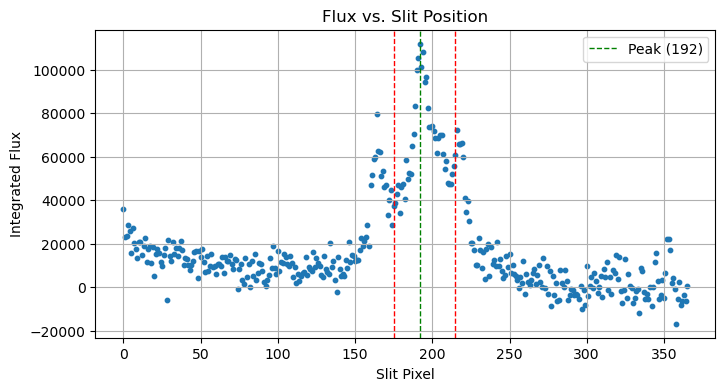

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 177


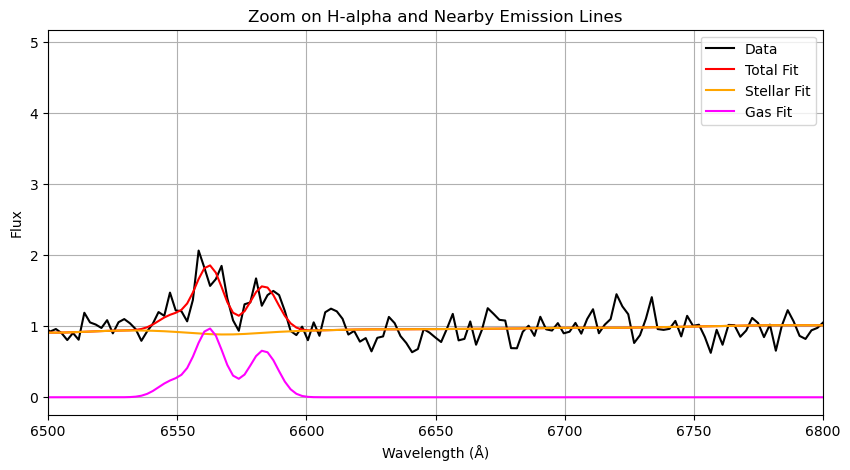

σ (km/s): 220.09

Window centre: 178


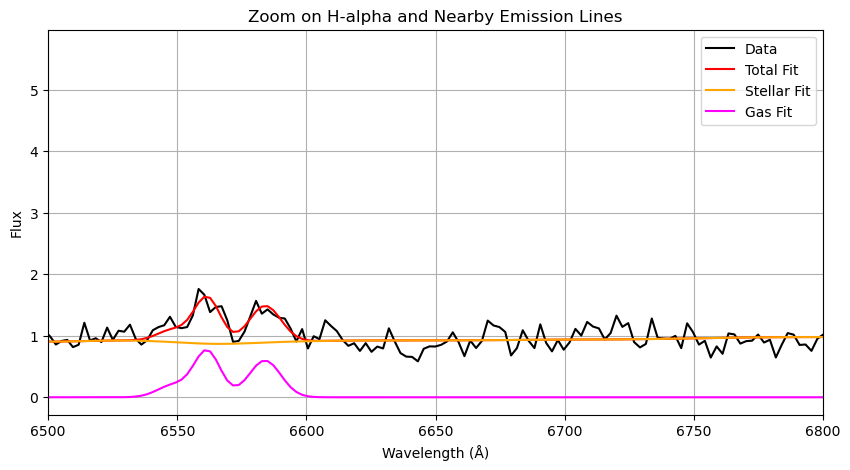

σ (km/s): 200.39

Window centre: 179


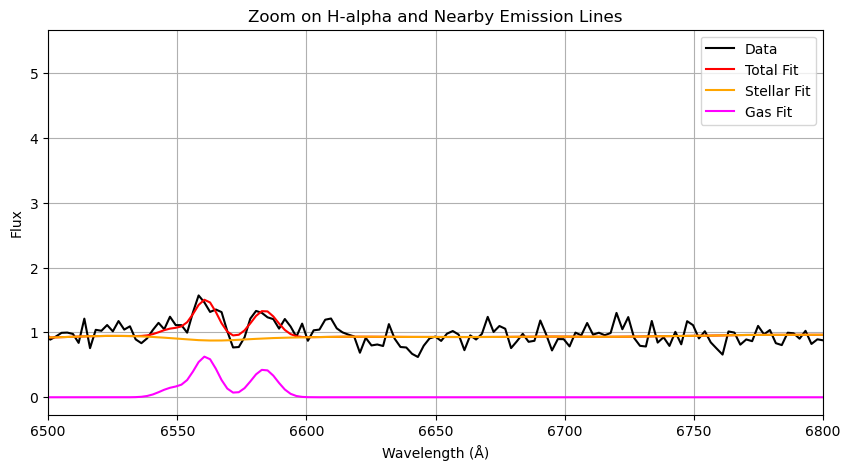

σ (km/s): 176.48

Window centre: 180


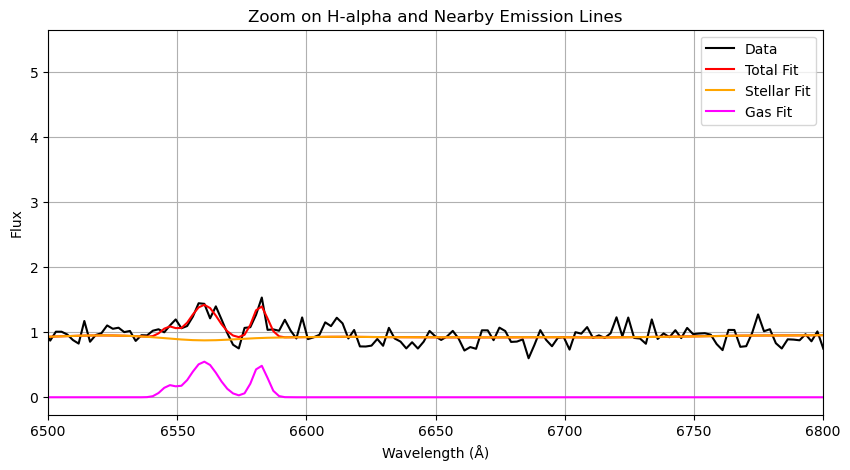

σ (km/s): 210.95

Window centre: 181


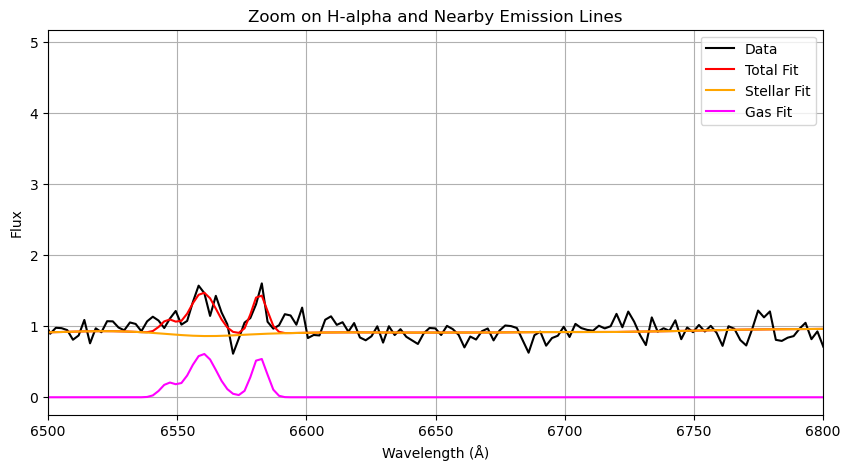

σ (km/s): 201.42

Window centre: 182


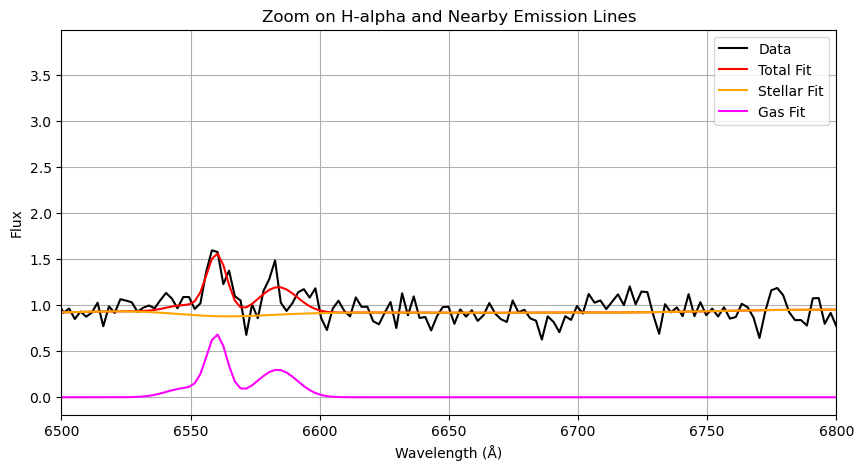

σ (km/s): 134.80

Window centre: 183


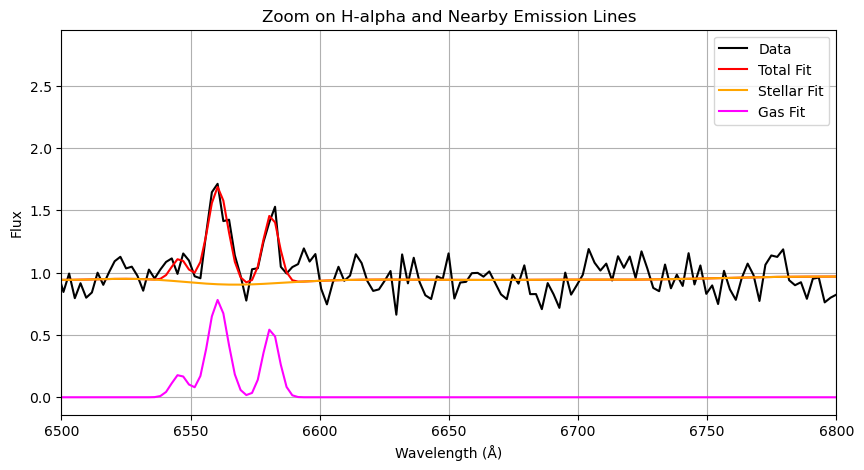

σ (km/s): 128.10

Window centre: 184


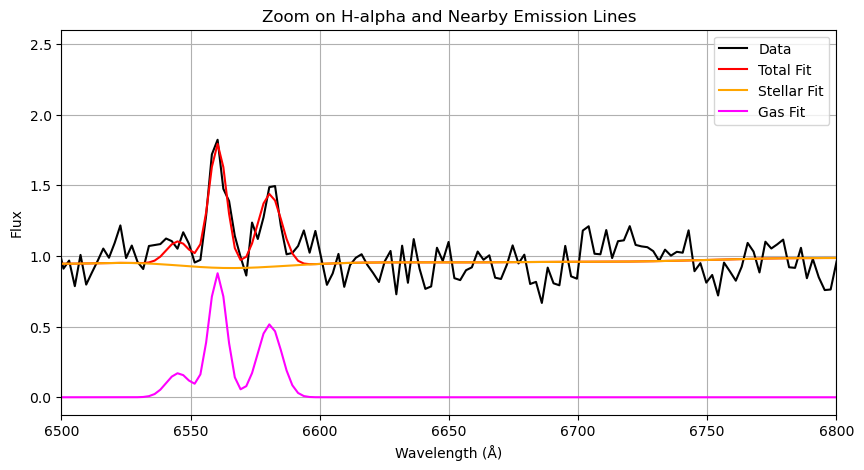

σ (km/s): 100.63

Window centre: 185


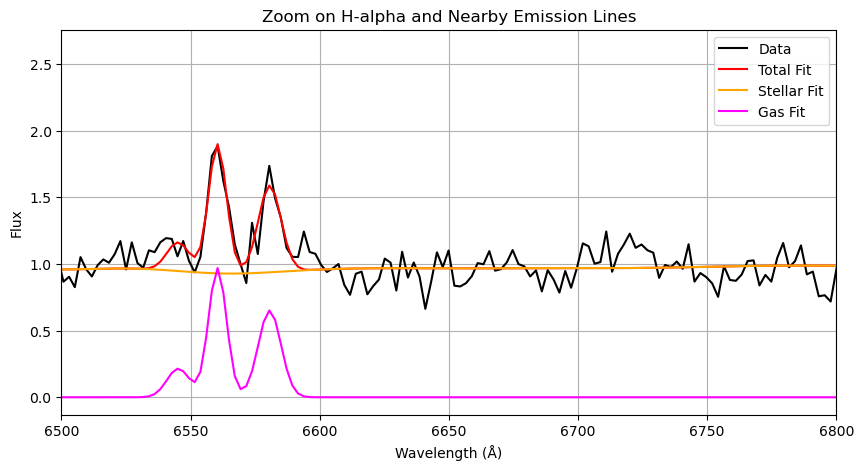

σ (km/s): 104.50

Window centre: 186


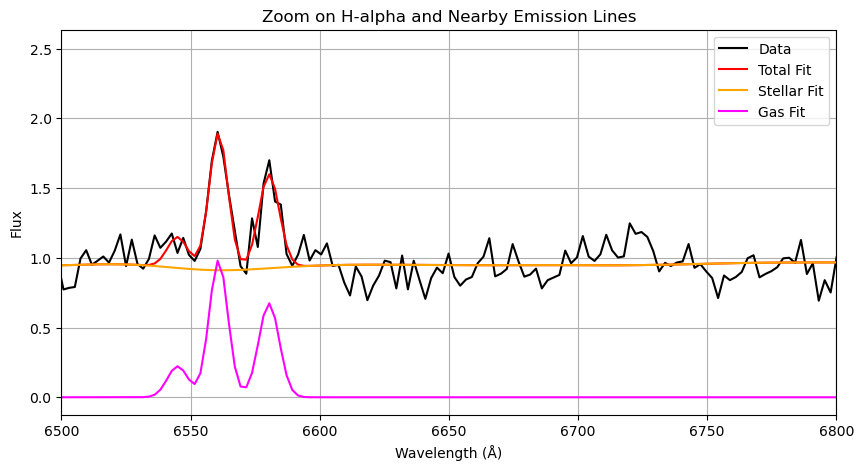

σ (km/s): 114.51

Window centre: 187


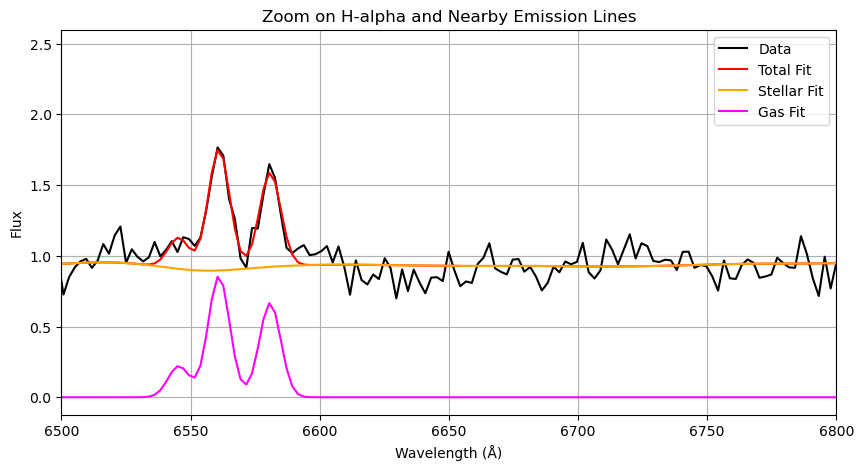

σ (km/s): 147.43

Window centre: 188


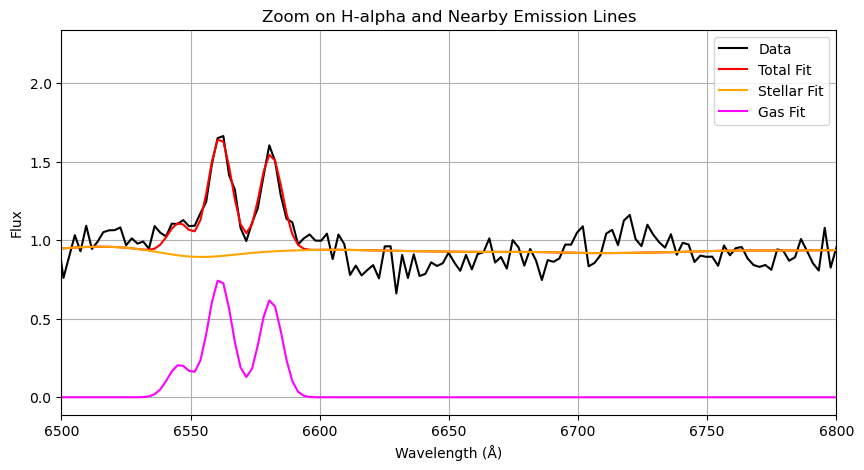

σ (km/s): 173.74

Window centre: 189


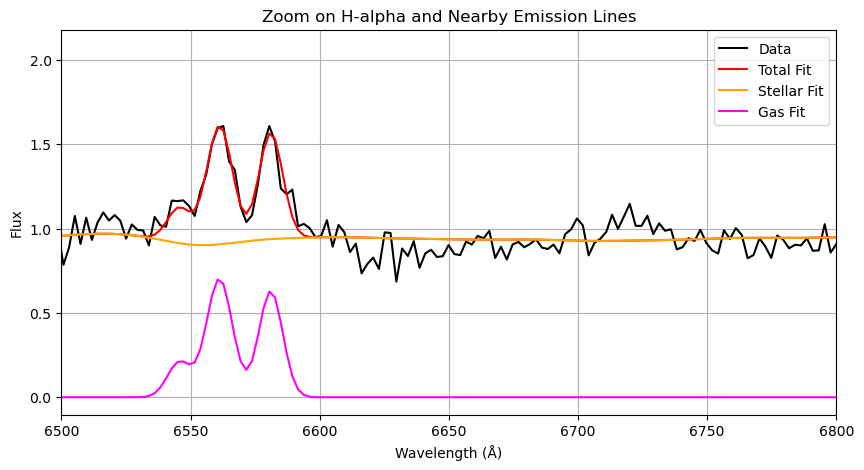

σ (km/s): 196.40

Window centre: 190


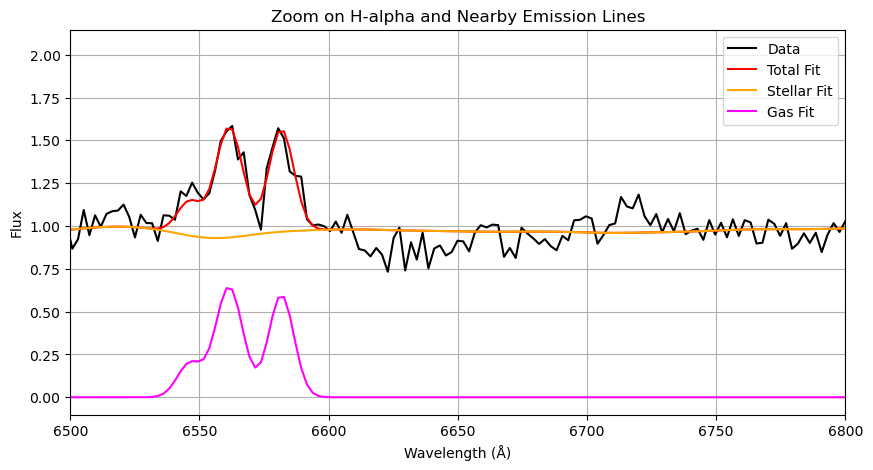

σ (km/s): 209.81

Window centre: 191


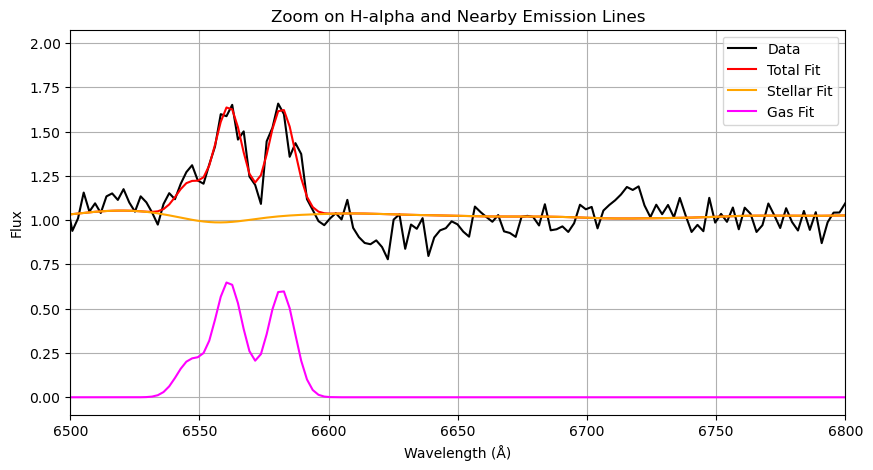

σ (km/s): 217.92

Window centre: 192


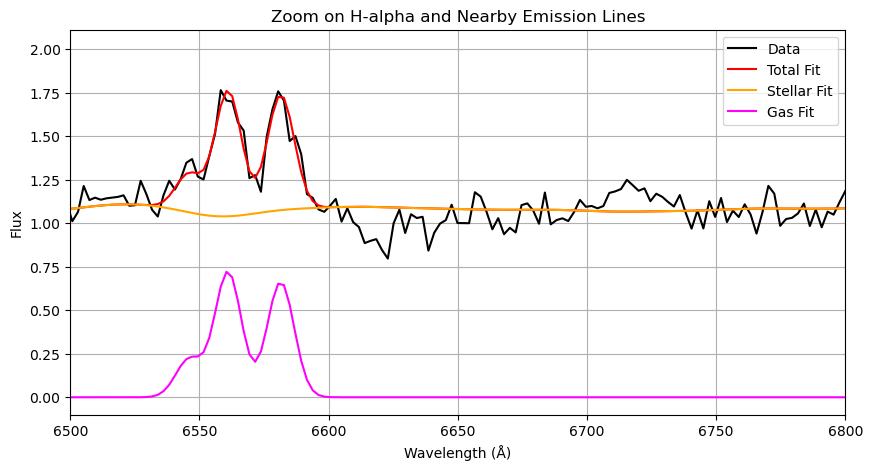

σ (km/s): 203.91

Window centre: 193


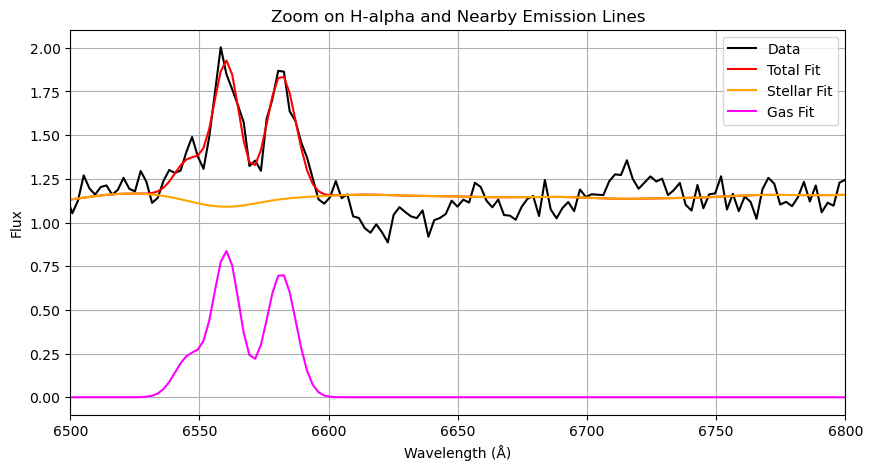

σ (km/s): 195.25

Window centre: 194


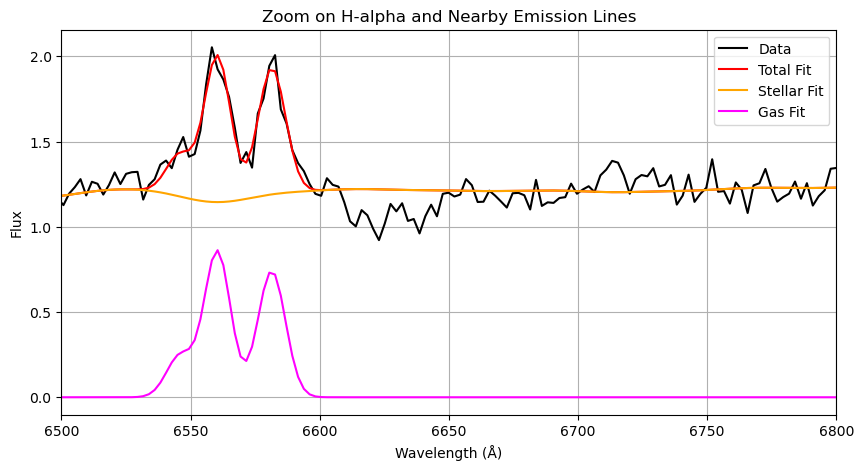

σ (km/s): 199.31

Window centre: 195


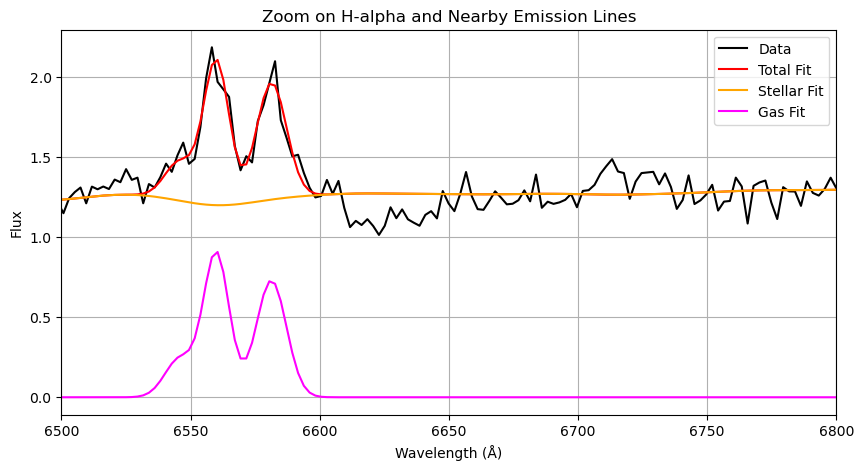

σ (km/s): 193.19

Window centre: 196


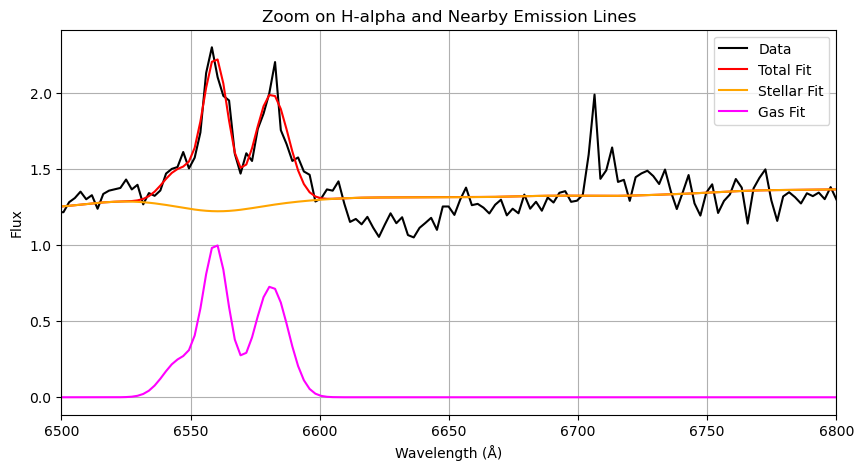

σ (km/s): 186.80

Window centre: 197


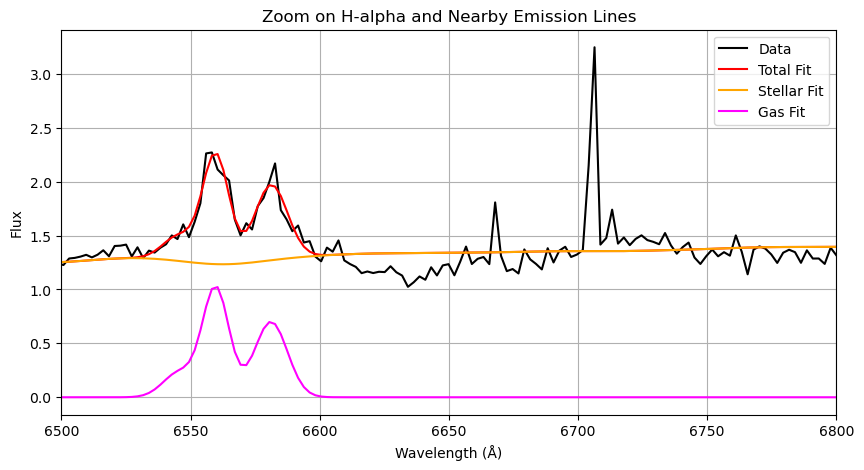

σ (km/s): 201.07

Window centre: 198


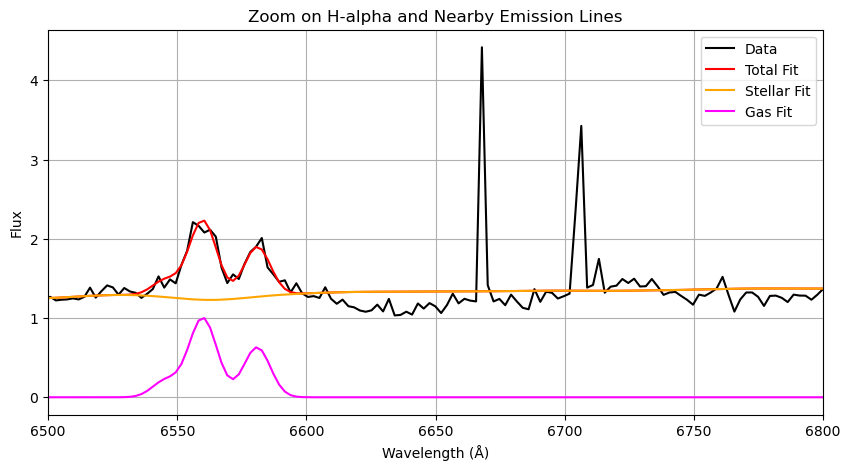

σ (km/s): 218.99

Window centre: 199


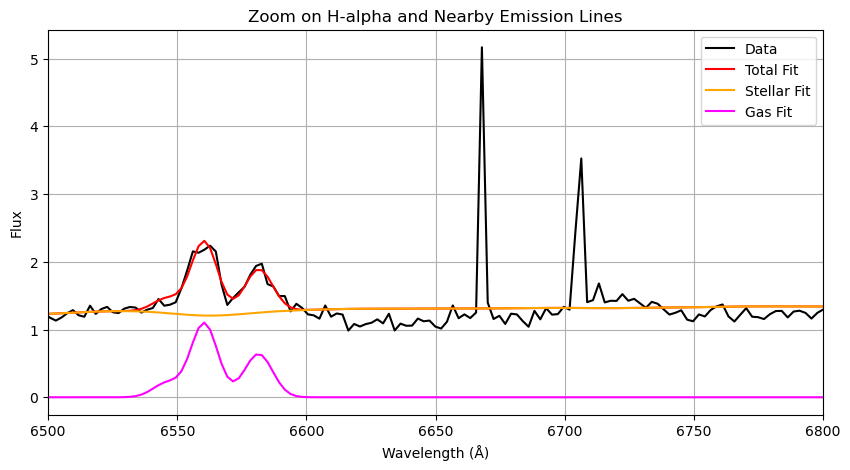

σ (km/s): 204.66

Window centre: 200


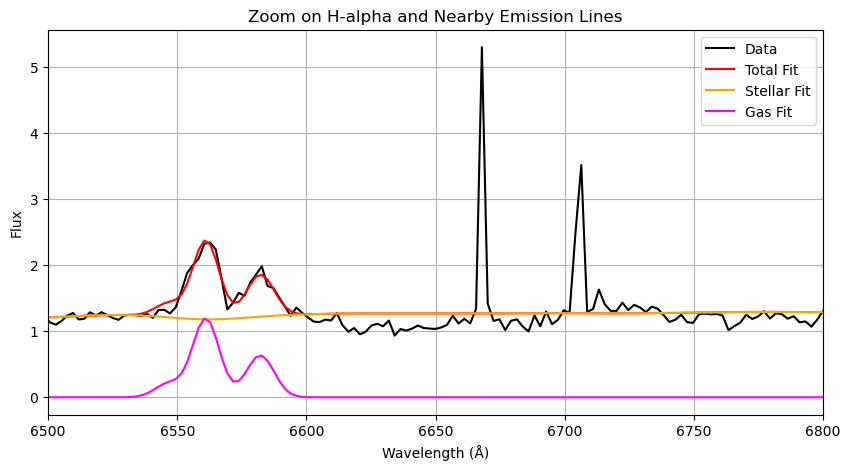

σ (km/s): 202.42

Window centre: 201


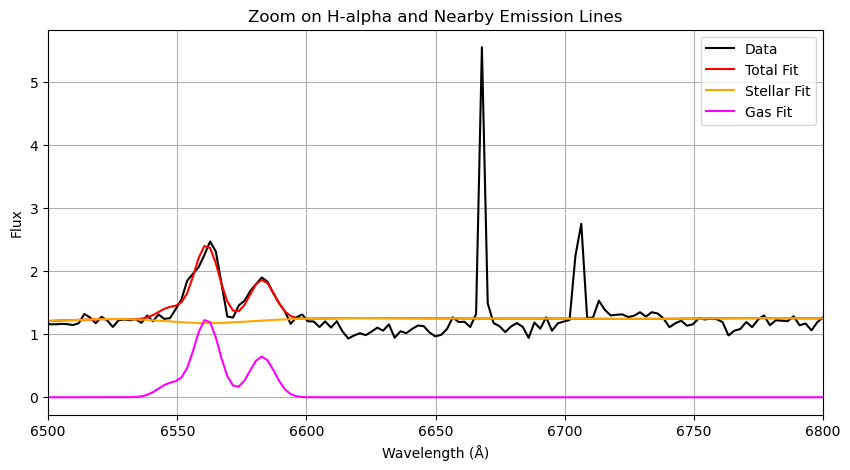

σ (km/s): 187.52

Window centre: 202


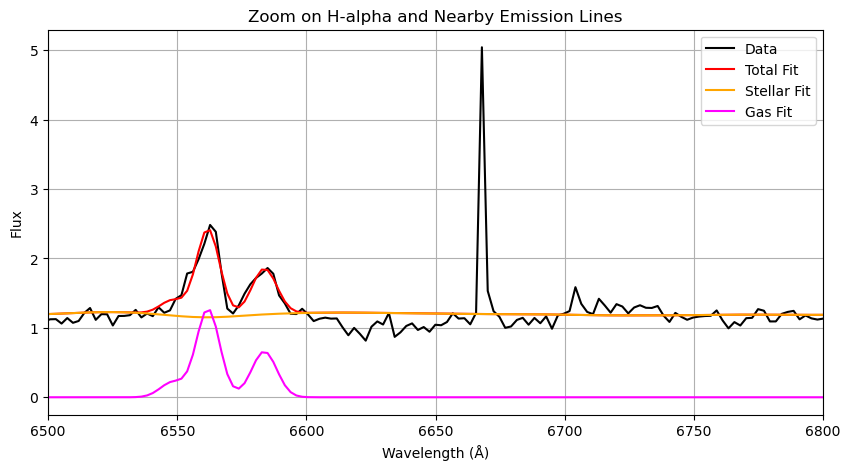

σ (km/s): 168.34

Window centre: 203


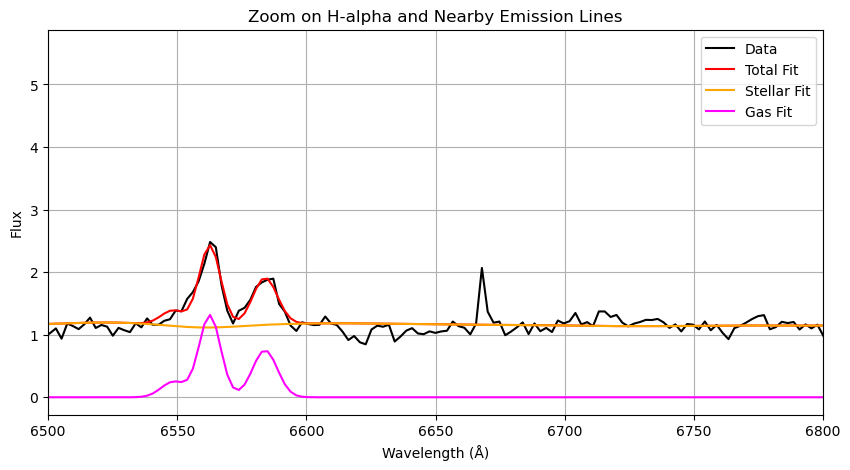

σ (km/s): 148.31

Window centre: 204


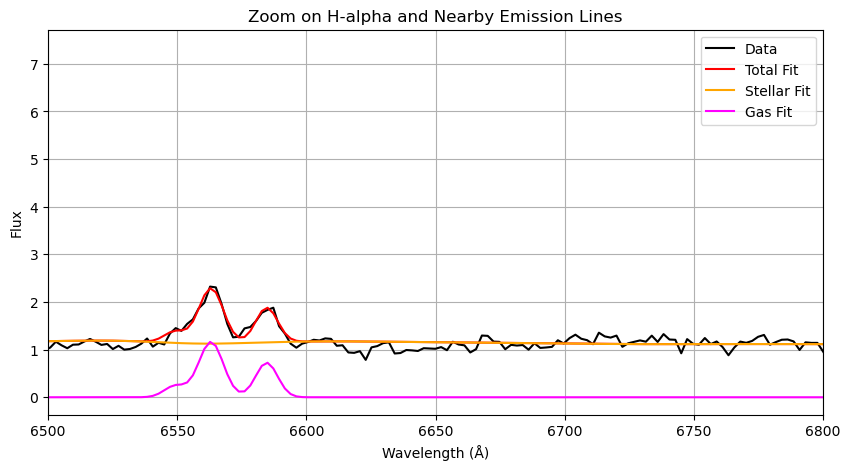

σ (km/s): 181.59

Window centre: 205


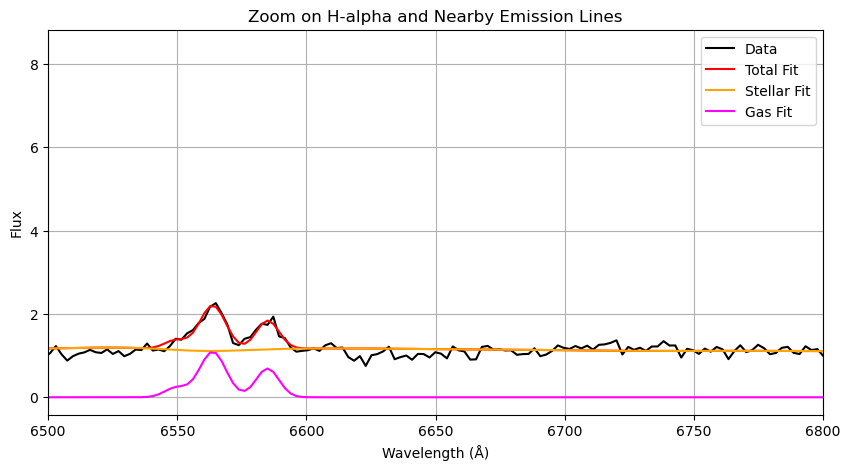

σ (km/s): 200.06

Window centre: 206


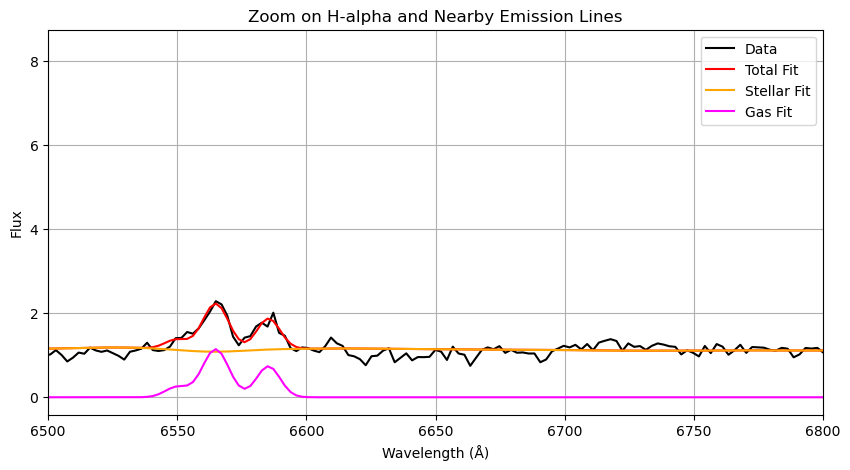

σ (km/s): 201.38

Window centre: 207


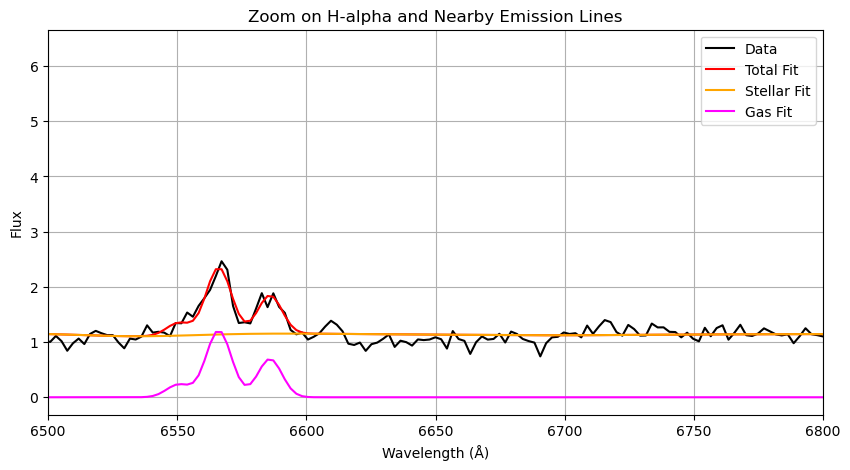

σ (km/s): 187.84

Window centre: 208


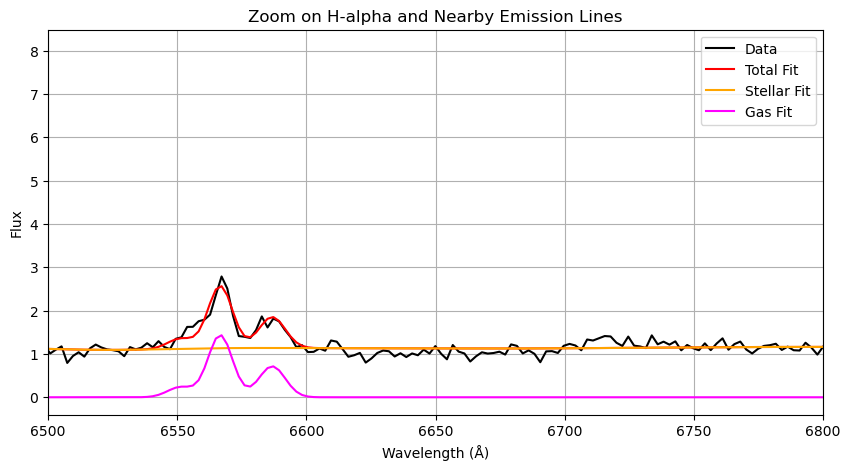

σ (km/s): 179.45

Window centre: 209


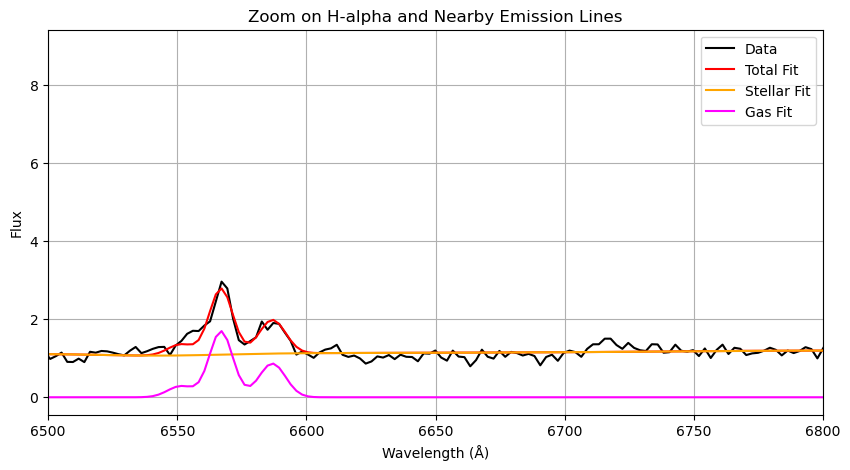

σ (km/s): 168.34

Window centre: 210


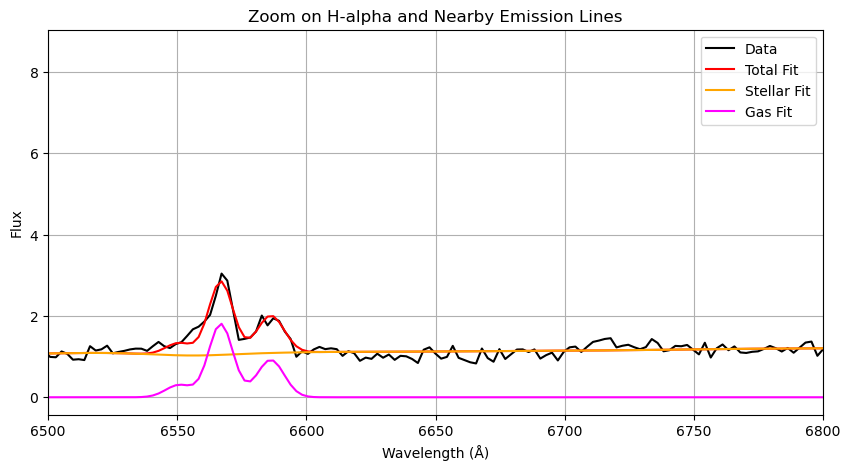

σ (km/s): 178.84

Window centre: 211


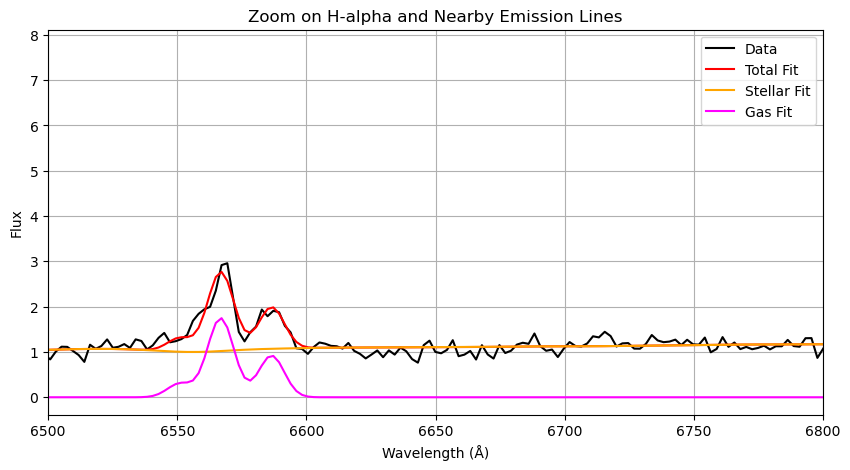

σ (km/s): 198.88

Window centre: 212


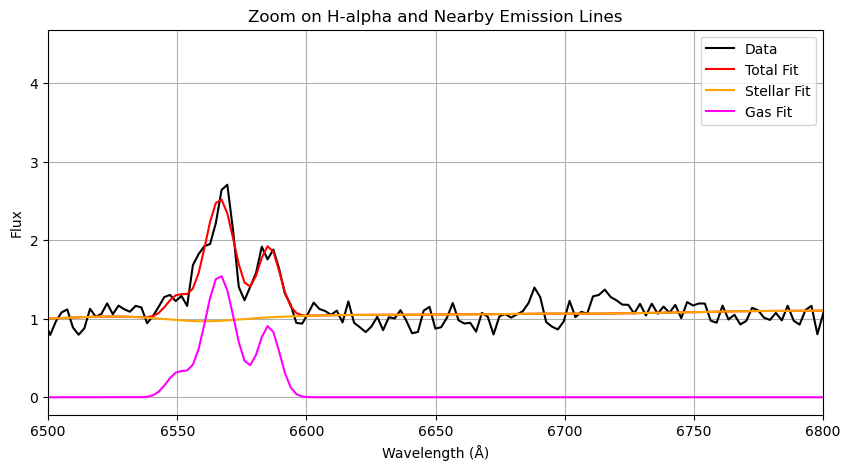

σ (km/s): 233.52

Window centre: 213


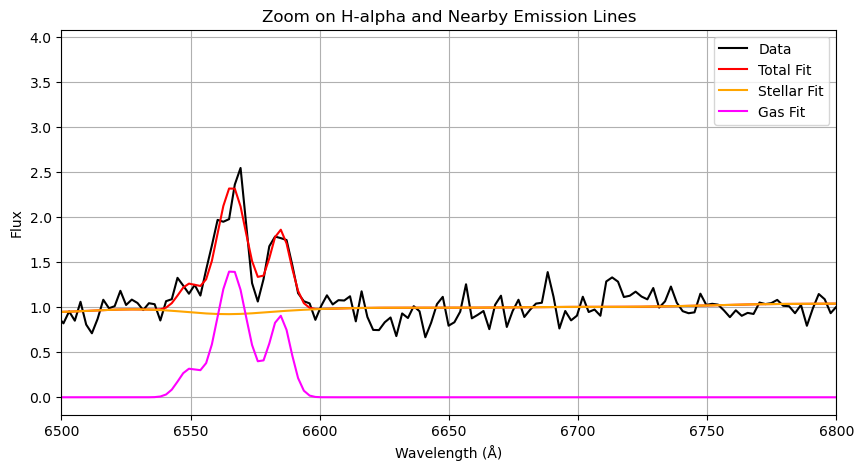

σ (km/s): 229.90

Window centre: 214


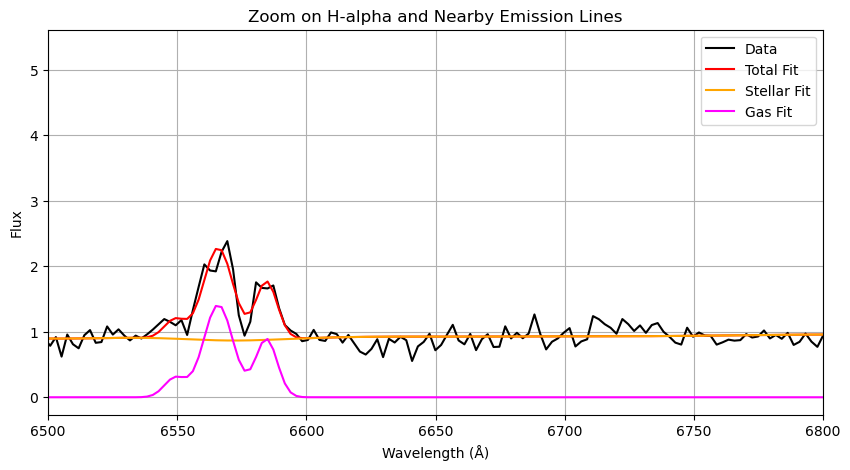

σ (km/s): 232.08

Window centre: 215


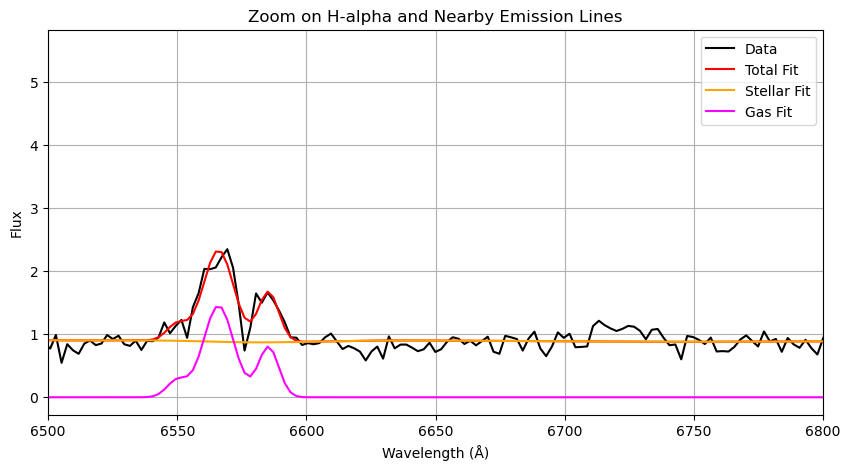

σ (km/s): 240.93

Window centre: 216


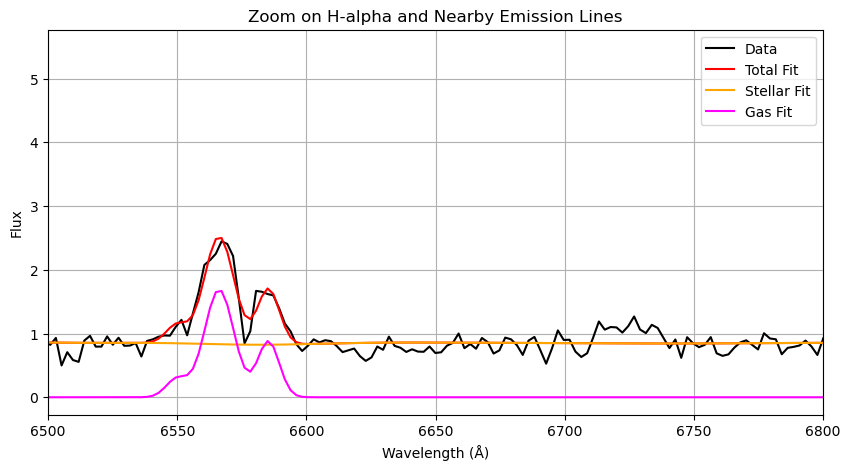

σ (km/s): 231.73

Window centre: 217


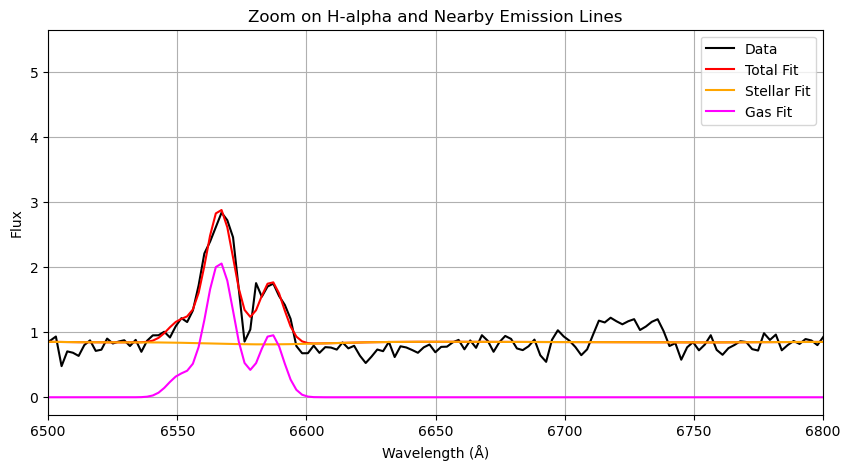

σ (km/s): 218.16

Window centre: 218


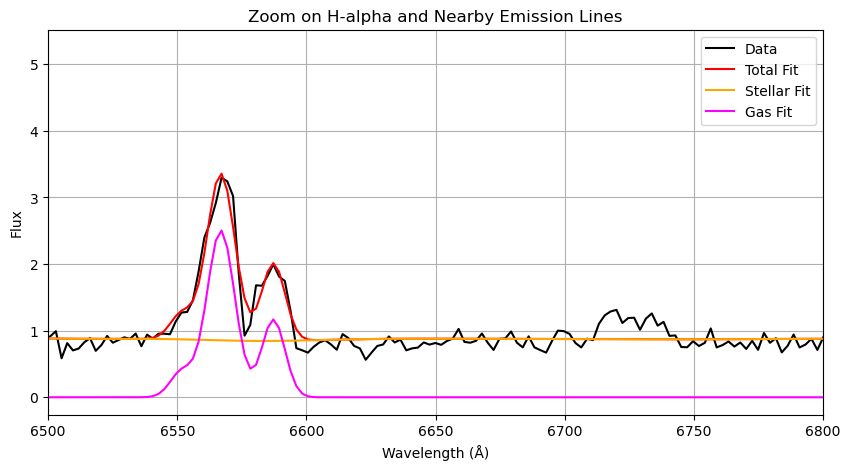

σ (km/s): 214.60

Window centre: 219


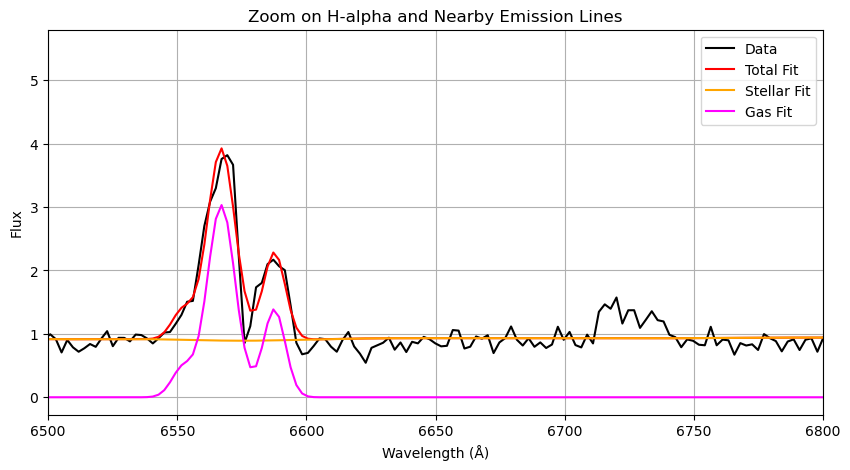

σ (km/s): 213.80

Window centre: 220


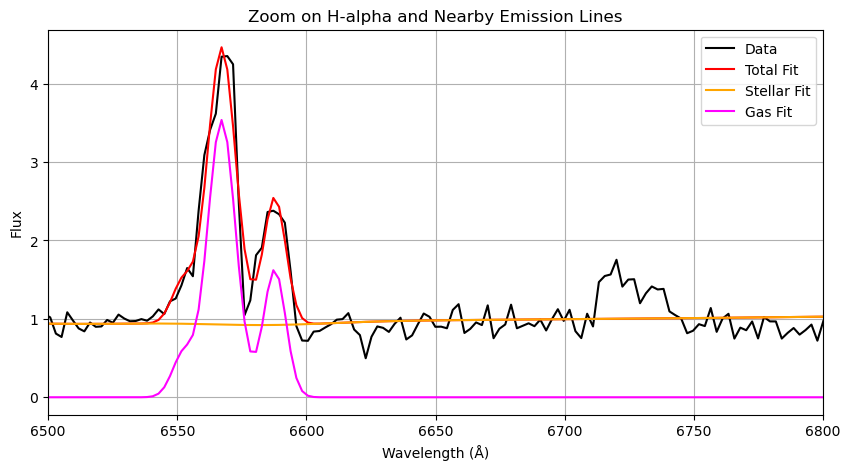

σ (km/s): 216.12

Window centre: 221


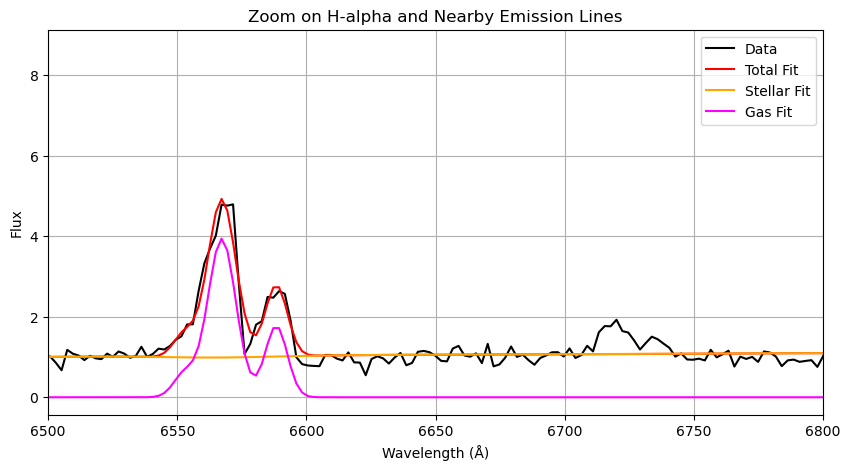

σ (km/s): 216.86

Window centre: 222


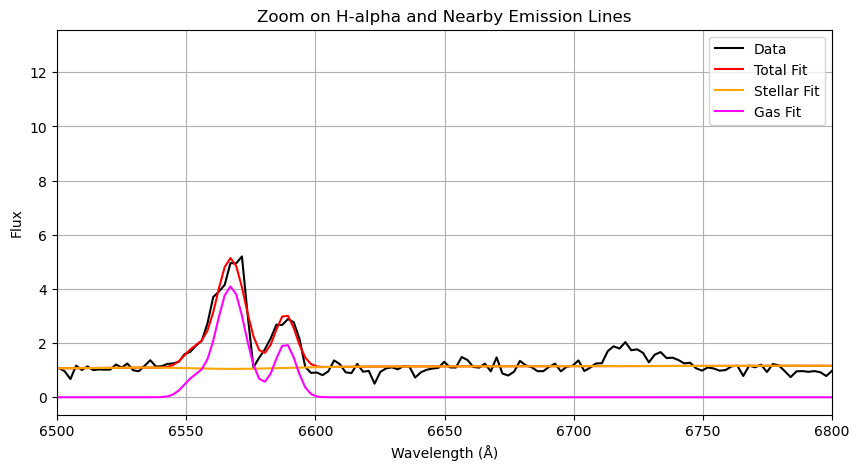

σ (km/s): 223.92

Window centre: 223


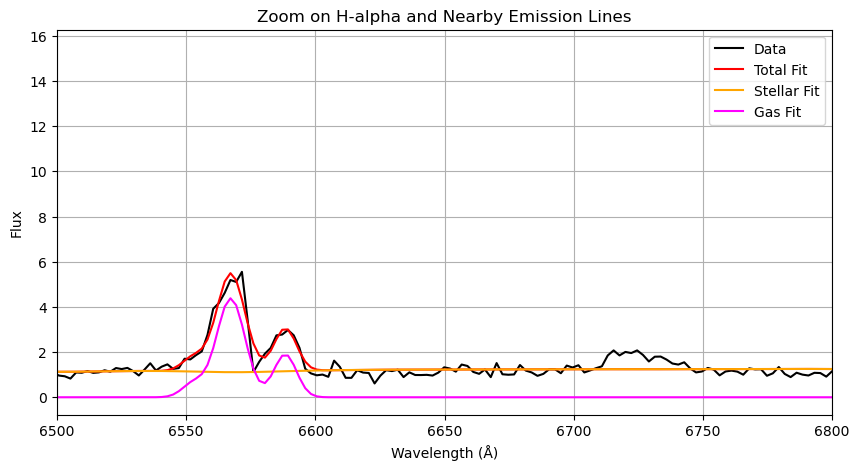

σ (km/s): 219.81

Window centre: 224


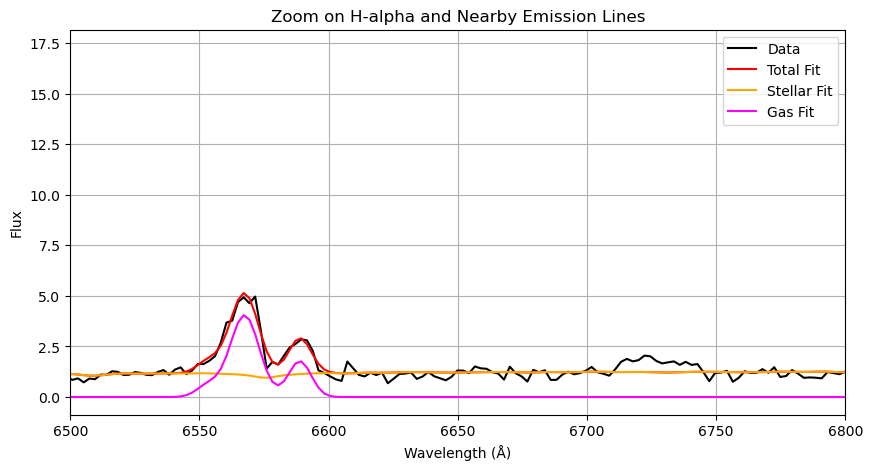

σ (km/s): 227.75

Window centre: 225


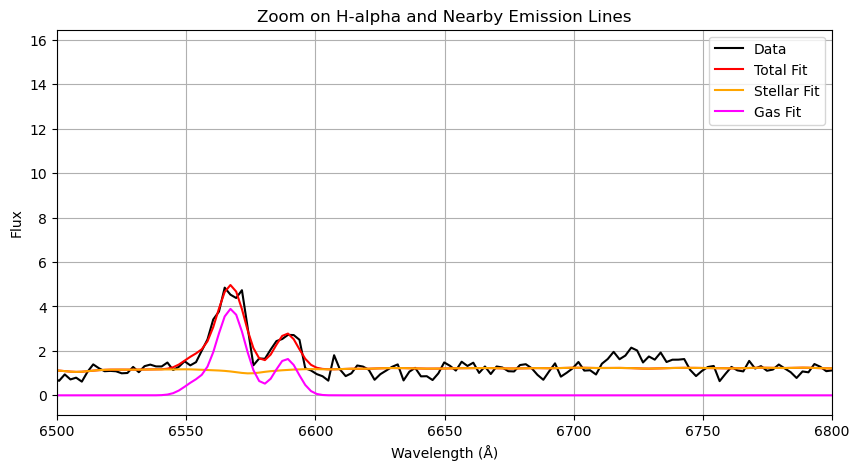

σ (km/s): 219.18

Window centre: 226


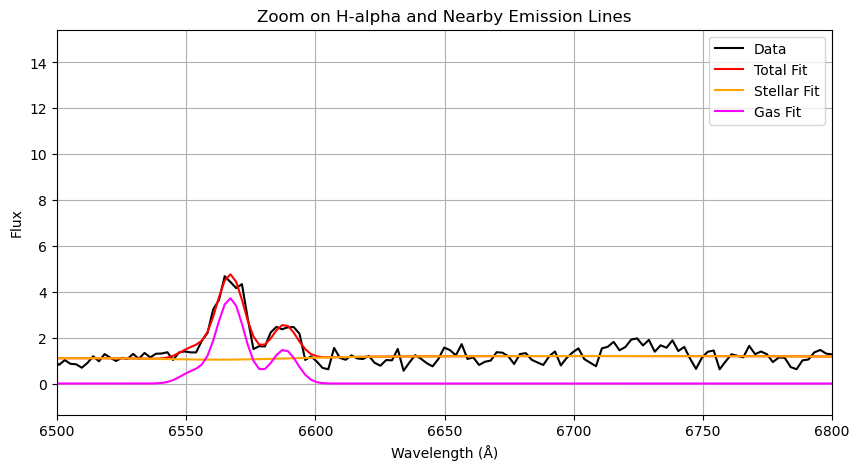

σ (km/s): 212.95

Window centre: 227


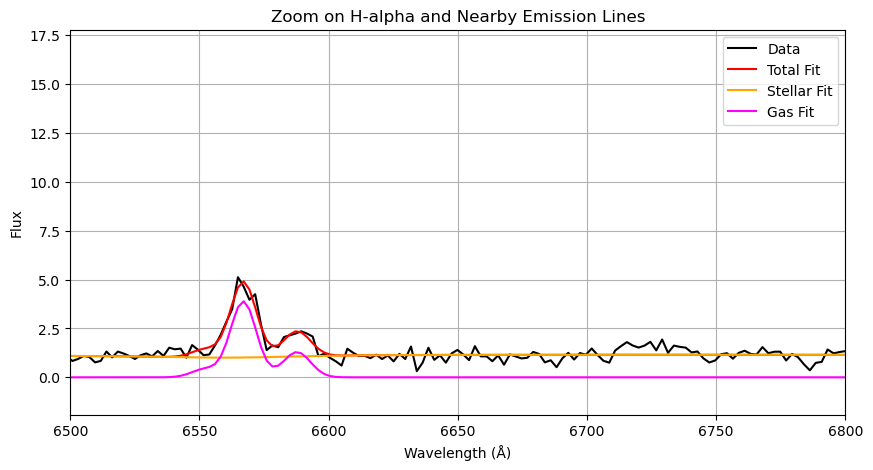

σ (km/s): 193.48

Window centre: 228


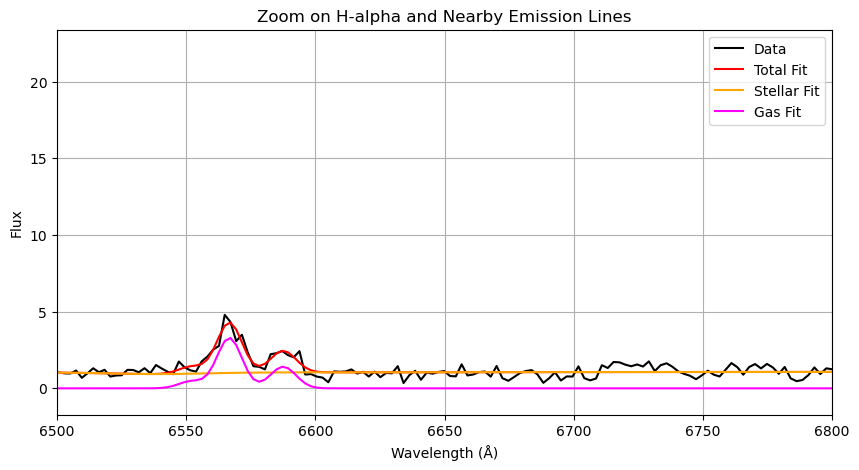

σ (km/s): 183.61

Window centre: 229


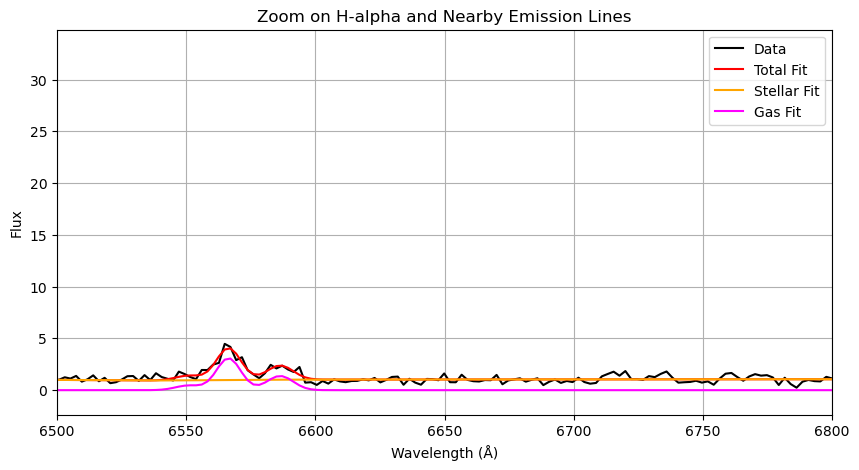

σ (km/s): 177.69

Window centre: 230


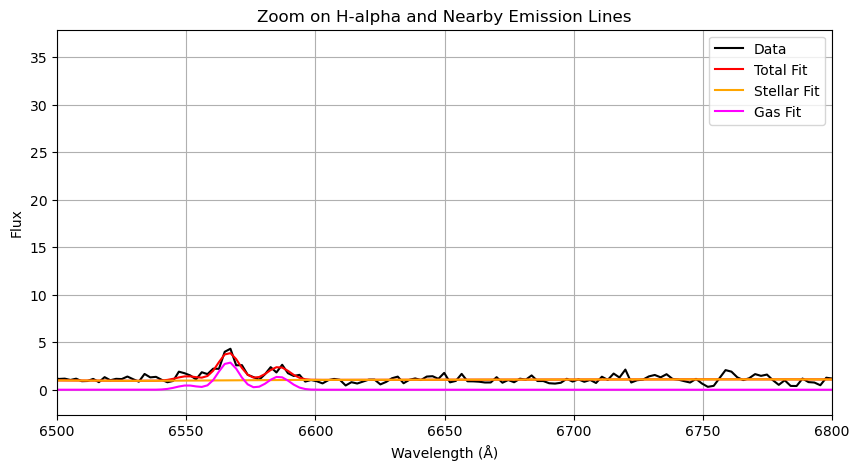

σ (km/s): 140.24

Window centre: 231


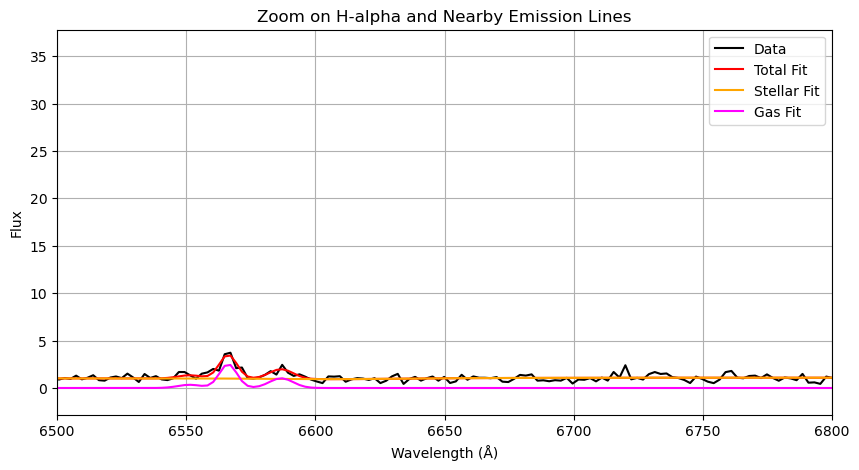

σ (km/s): 97.39

Window centre: 232


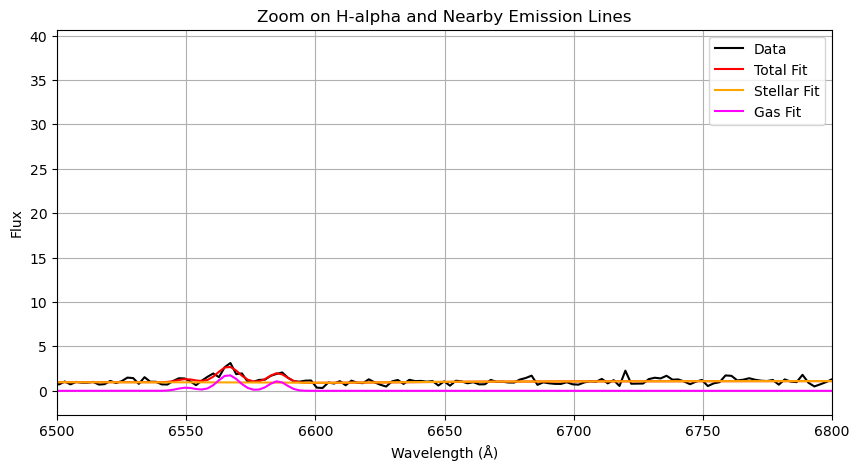

σ (km/s): 141.36

Window centre: 233


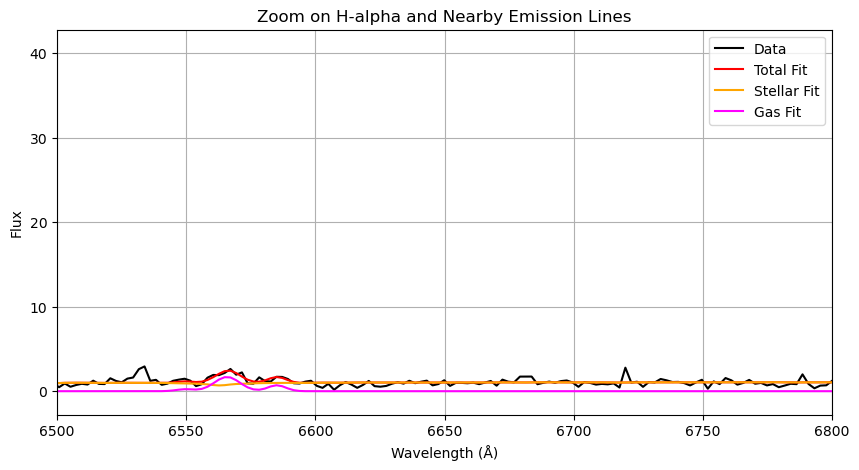

σ (km/s): 188.77

Window centre: 234


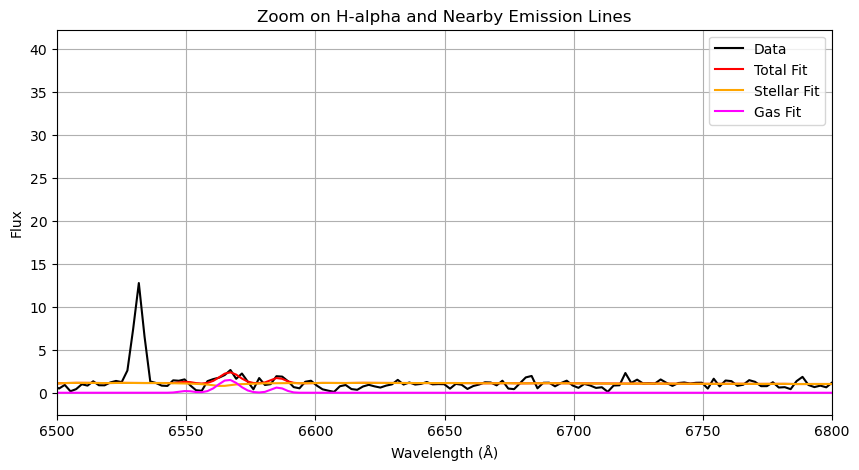

σ (km/s): 137.24

Window centre: 235


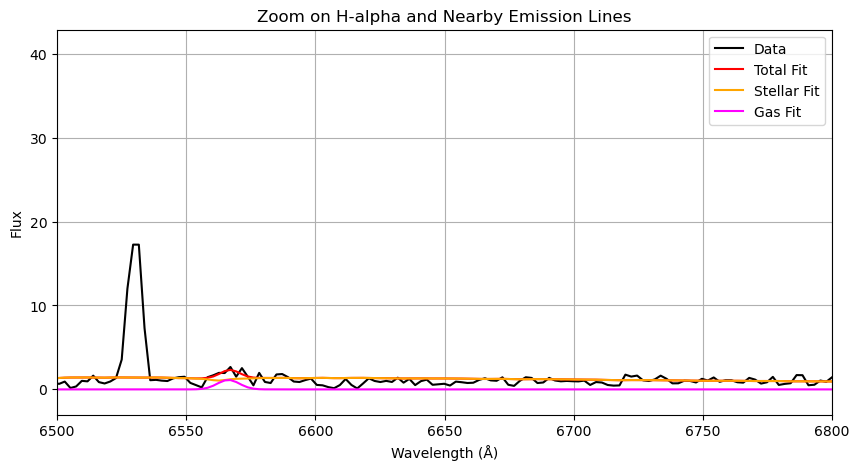

σ (km/s): 153.64

Window centre: 236


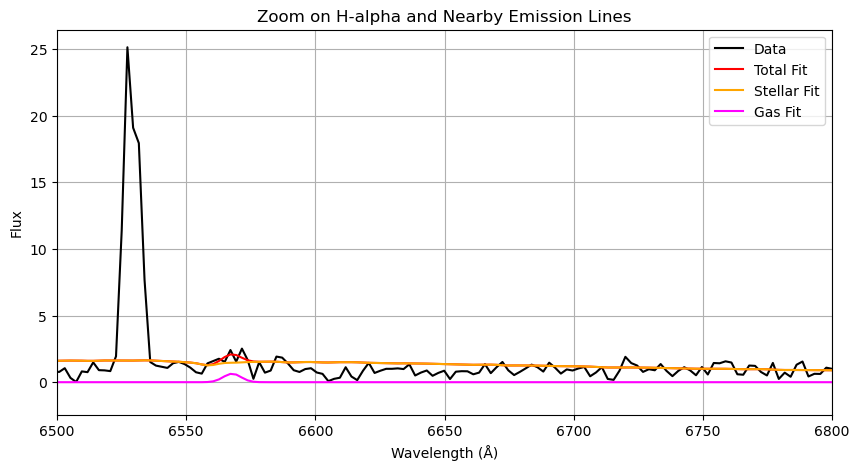

σ (km/s): 99.95

Window centre: 237


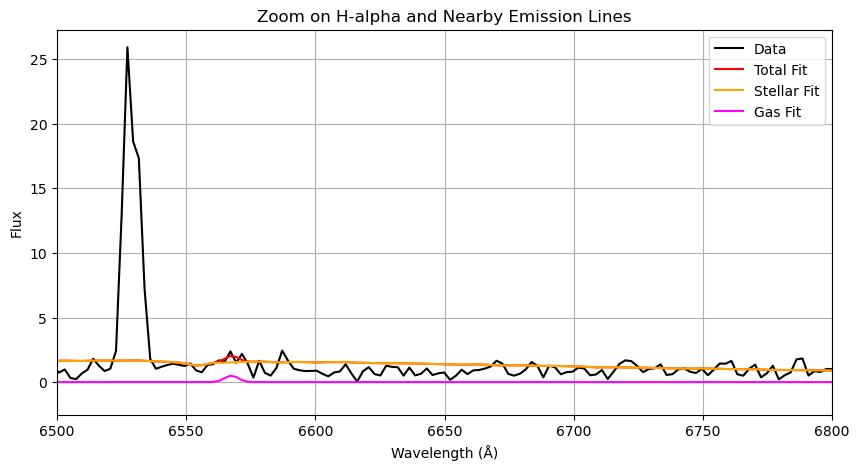

σ (km/s): 1.01

Window centre: 238


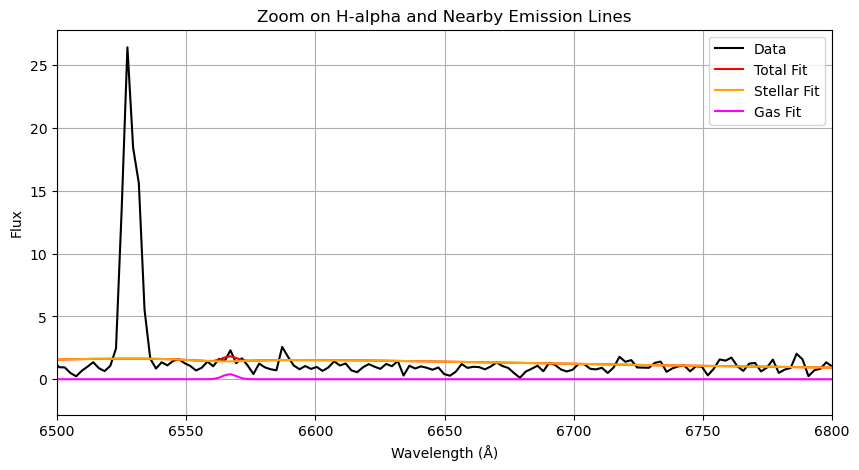

σ (km/s): 1.01

Window centre: 239


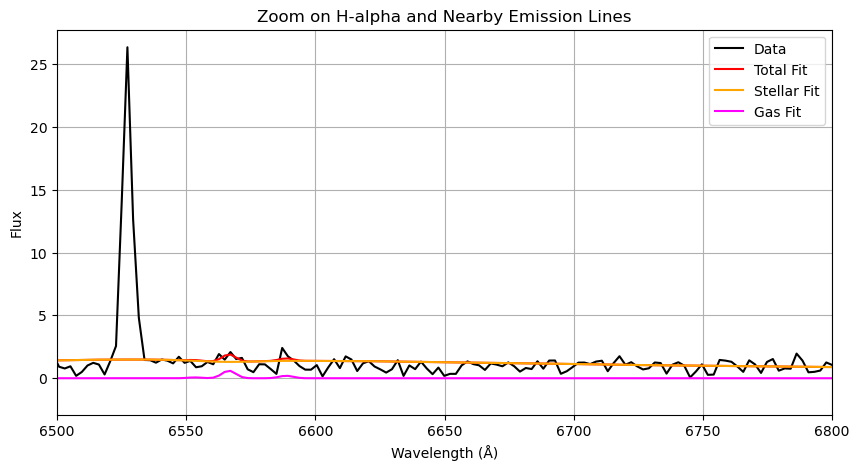

σ (km/s): 5.08

Window centre: 240


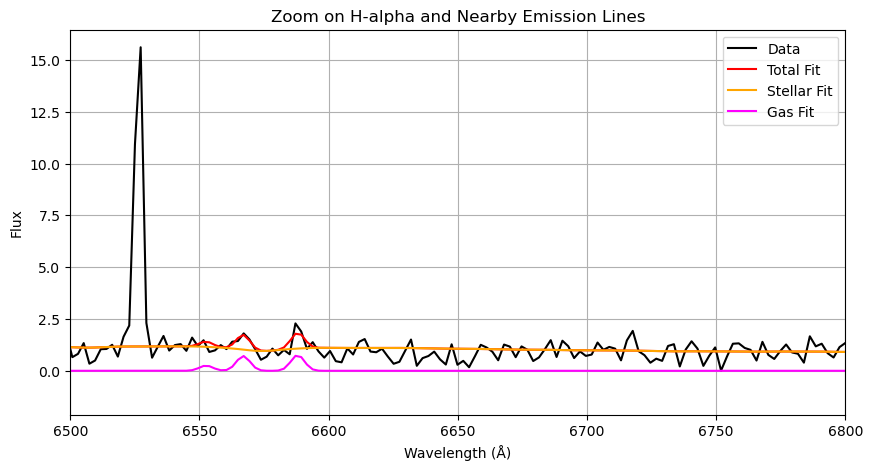

σ (km/s): 1.01

Window centre: 241


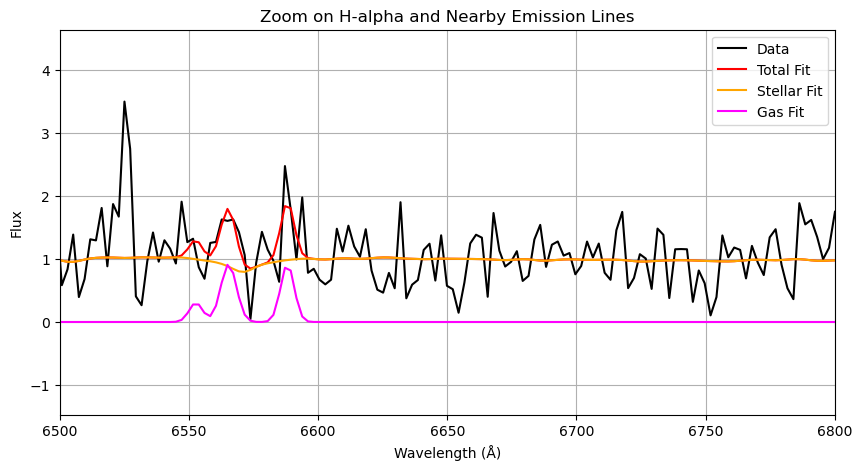

σ (km/s): 70.76

Window centre: 242


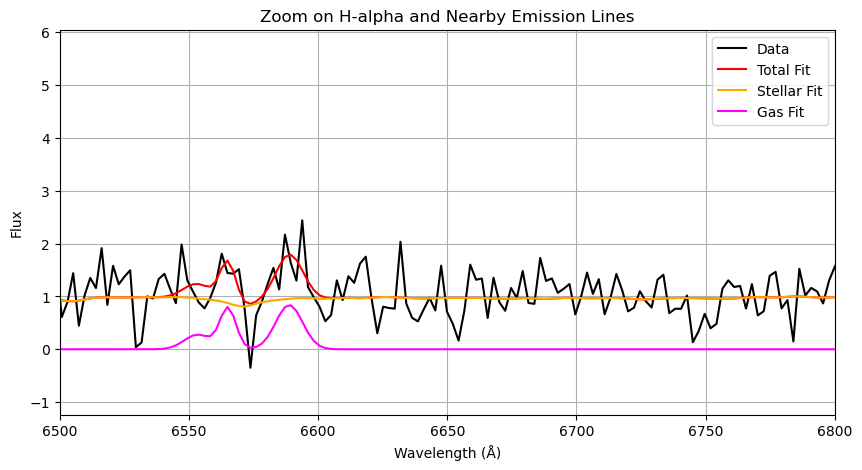

σ (km/s): 76.61

Window centre: 243


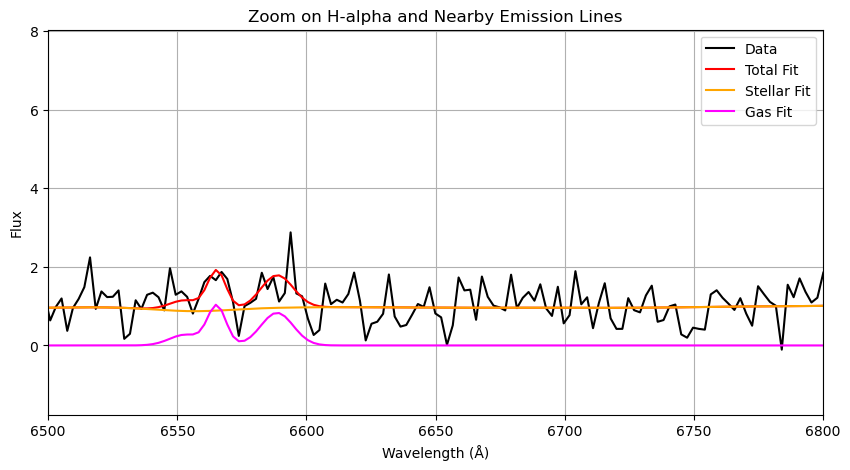

σ (km/s): 108.42

Window centre: 244


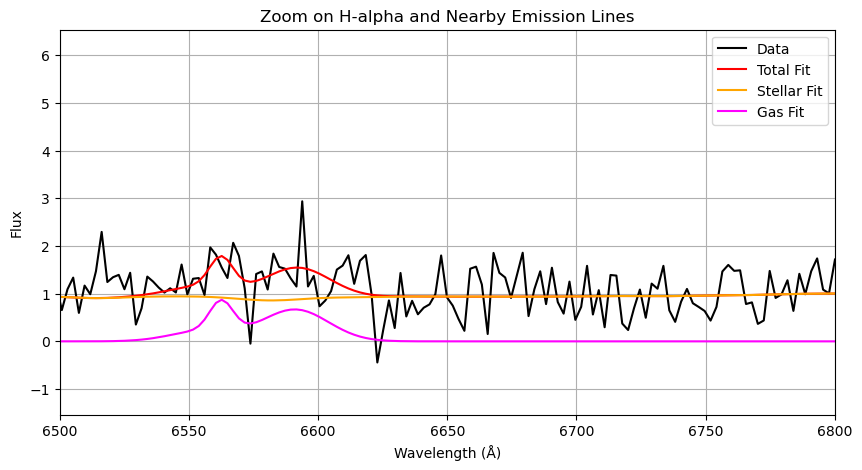

σ (km/s): 167.64

Window centre: 245


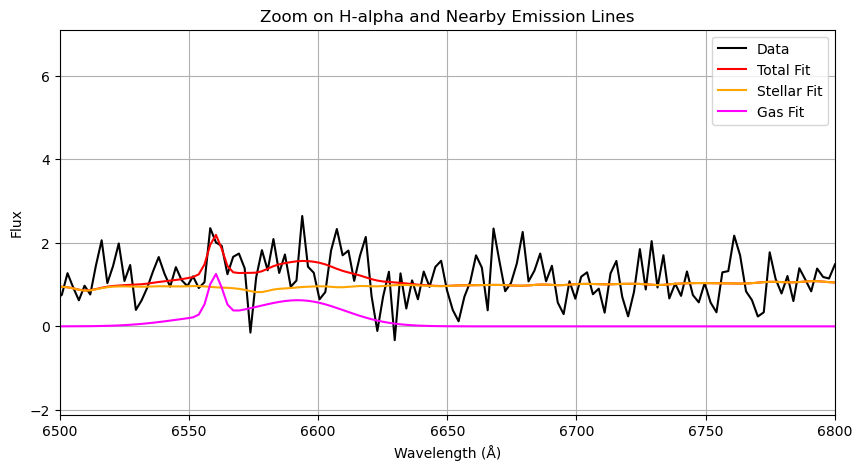

σ (km/s): 1.01

Window centre: 246


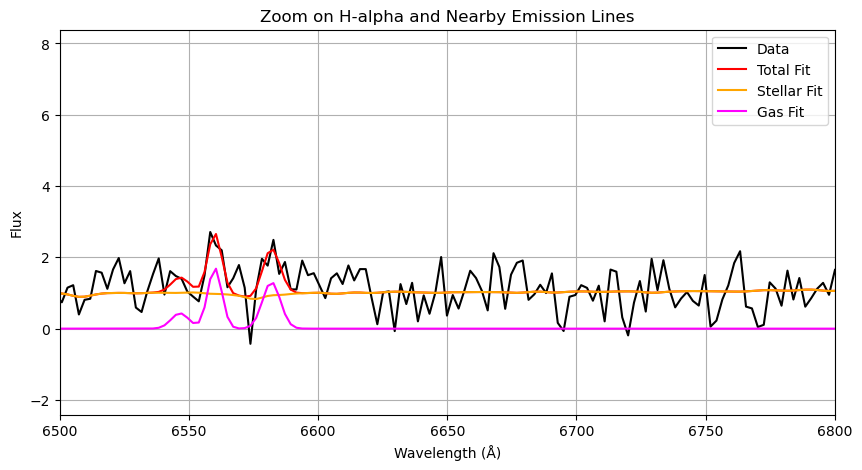

σ (km/s): 29.85

Window centre: 247


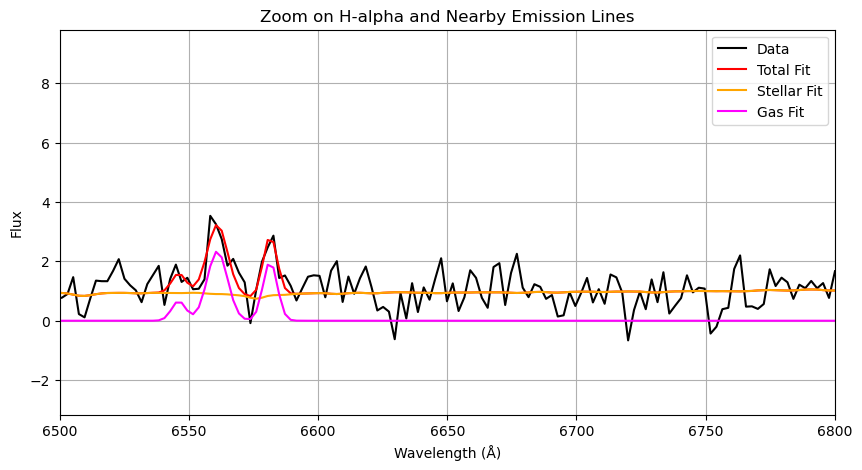

σ (km/s): 133.45



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)

    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


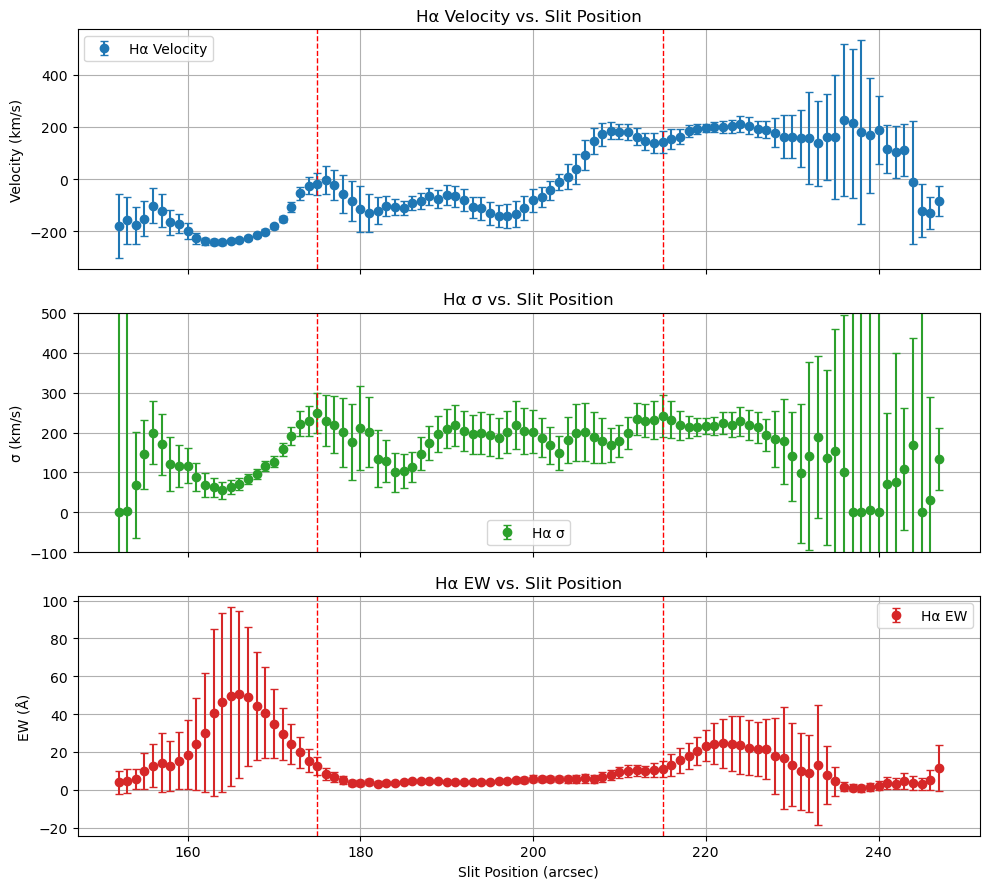

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha results/SB2_halpha_results.csv', index=False)
